In [1]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline

In [2]:
words = open("names.txt", 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [7]:
chars = sorted(list(set("".join(words))))
stoi = {s: i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [228]:
# building dataset
block_size = 3
X, Y = [], []
for w in words:
#     print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
#         print("".join(itos[i] for i in context), "---->",  itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [122]:
X.size, X.shape, Y.size, Y.dtype

(<function Tensor.size>,
 torch.Size([228146, 3]),
 <function Tensor.size>,
 torch.int64)

In [123]:
g = torch.Generator().manual_seed(232846528)

In [84]:
C = torch.randn((27, 2), generator=g)

In [85]:
C[5]

tensor([0.6457, 1.9811])

In [86]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.6457, 1.9811])

In [104]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [89]:
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)

In [90]:
h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
h

tensor([[ 0.7670,  0.7185, -0.8472,  ...,  0.9964, -0.9612,  0.9961],
        [ 0.9999,  0.9423,  0.9062,  ..., -0.8376,  0.1343,  0.6847],
        [ 0.8686,  0.9819, -0.2931,  ...,  0.9098, -0.8958,  0.5969],
        ...,
        [-0.5984,  0.6034,  0.9760,  ...,  0.5785, -0.8396, -0.0787],
        [-0.9982, -0.9330, -0.5409,  ..., -0.9678,  0.7151,  0.9962],
        [-1.0000, -0.9982, -0.9941,  ...,  0.8972,  0.2912, -0.0512]])

In [91]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]], 1).shape

torch.Size([32, 6])

In [92]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [93]:
h.shape

torch.Size([32, 100])

In [94]:
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

In [95]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [96]:
logits[:1]

tensor([[  7.6552,   6.7801,   7.5256,   2.2582,  -4.5142,  -2.5109,  -2.9131,
          -1.4337,   9.7833,  -6.9811,   1.0111,  -8.1132,  -2.4502,  -4.0066,
          -8.7840,   1.2414,   3.4701,  13.7543,   4.2270,  -0.3975,   3.8822,
         -11.0299,   5.6416,   6.1909,   1.4105,  -8.7818, -10.8841]])

In [97]:
counts = logits.exp()

In [98]:
prob = counts/counts.sum(1, keepdims=True)

In [99]:
prob.shape

torch.Size([32, 27])

In [100]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [101]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [102]:
loss = -prob[torch.arange(32), Y].log().mean()
loss.item()

16.964468002319336

In [103]:
parameters = [C, W1, b1, W2, b2]

In [105]:
F.cross_entropy(logits, Y)

tensor(16.9645)

In [124]:
##dataset
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [225]:
# import random
# random.shuffle(words)

# sz = X[0]
# Xtr, Ytr = X[:sz*0.8], Y[:sz*0.8]
# Xdev, Ydev = X[sz*0.8:sz*0.9], Y[sz*0.8:sz*0.9]
# Xtest, Ytest = X[sz*0.9:], Y[sz*0.9:]

TypeError: object of type 'NoneType' has no len()

In [204]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [248]:
g = torch.Generator().manual_seed(232846528)
C = torch.randn((27, 20), generator=g, requires_grad = True)
W1 = torch.randn((60, 200), generator=g, requires_grad = True)
b1 = torch.randn(200, generator=g, requires_grad = True)
W2 = torch.randn((200, 27), generator=g, requires_grad = True)
b2 = torch.randn(27, generator=g, requires_grad = True)
parameters = [C, W1, b1, W2, b2]

In [249]:
sum(p.nelement() for p in parameters)
# for p in parameters:
#     requires_grad = True

18167

In [259]:
lri = []
lossi = []

for i in range(50000):
    
    #mini batch construction
    ix = torch.randint(0, X.shape[0], (32, ))
    
    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(emb.shape[0], 60) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    # print("loss =", loss.item())
    # counts = logits.exp()
    # prob = counts/counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    # loss
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
#     lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
    
    #track stats
#     lri.append(lre[i])
#     lossi.append(loss.item())

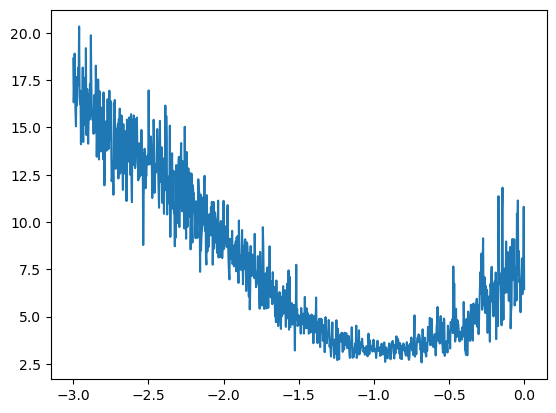

In [208]:
plt.plot(lri, lossi)

In [131]:
torch.randint(0, X.shape[0], (32, ))

tensor([205188, 226448, 177225, 132655, 179661, 187890,  97187, 143519,  61669,
        177390,  81861, 121187, 217296,  14480, 129192,  43301, 193409,  64515,
         20004, 156992,  44510, 169204, 158714, 144822,  86242, 216372,  56621,
         45611, 186475, 227985,  94411, 125621])

In [260]:
emb = C[X]
h = torch.tanh(emb.view(emb.shape[0], 60) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.0660, grad_fn=<NllLossBackward0>)

In [262]:
gta = torch.Generator().manual_seed(232846528 + 10)
block_size = 3
for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim = 1)
        ix = torch.multinomial(probs, num_samples = 1, generator = gta).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    
    print("".join(itos[i] for i in out))

vick.
nataleksora.
yor.
bentieiden.
salayariann.
jaicy.
ur.
joalye.
alee.
damarian.
ruby.
azaerin.
ben.
mar.
mod.
jula.
alain.
lic.
ayvi.
avan.
